In [1]:
# Import libraries to use 
import numpy as np
import matplotlib.pyplot as plt
import math       
import scipy as sp
import scipy.optimize
import subprocess # Library to run ngspice on shell
import seaborn as sns # Library to change the color palette for plots
import random
import timeit # To time computing time
import warnings # To supress warnings
import string
import pandas as pd

import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
axis_font = {'size':'14'}

# Heater simulation for tapes 38
- The results from the heater experiments are plotted
- The heater used for these results is H1 located between sections V3 and V4
- The peak voltages are choosen with the same time stamp where the voltage in V4 has its maximum value
- Transport current applied to the tape was 80 A. 
- Different voltage levels of the heater were used for each tape before and after the coating.


In [2]:
def main(file_csv,tape_number,Vheater,filenumber,current_percent,filename,coating):
    # Data base for the file without coating
    print(Vheater)
    data_ic_wo = pd.read_csv(file_csv)
    #time_ic_wo = data_ic_wo['time']
    last_index = len(data_ic_wo['v4_m'])
    stop = (last_index)*(0.19984)
    time_ic_wo = np.arange(0,stop,0.19984)
    
    # For loop to print the voltages from the 12 sections
    fig,ax = plt.subplots()
    for i in range(12): 
        v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
        ax.plot(time_ic_wo,(v_wo-v_wo[0])/1e-3,label = f'V{i+1}')

    ax.set_xlabel('Time (s)',**axis_font)
    ax.set_ylabel('Voltage (mV)',**axis_font)
    ax.set_ylim(-1,7)
    ax.legend(labelspacing=0.001,ncol=1,loc='upper right',prop={'size':10}) 
    ax.grid()

    ax2 = ax.twinx()
    ax2.plot(time_ic_wo,data_ic_wo['T1_m'],'--k')
    ax2.set_ylabel('Temperature (K)',**axis_font)
    ax2.set_ylim(70,450)
    plt.title(f'Tape {tape_number} '+coating+f' VOx coating {current_percent} A, heater {Vheater} V',**axis_font)
    plt.tight_layout()
    plt.show()
    
    max_T, max_index =  max(data_ic_wo['v4_m']), np.where(data_ic_wo['v4_m'] == max(data_ic_wo['v4_m']))[0][0]
    print(f'V_heater',Vheater,': Max V4 =',max_T,'V, index',max_index)

    #filename = f'Tape {tape_number} heater {current_percent} A peak voltages without coating.txt'
    
    if filenumber<1:
        max_V = []
        for i in range(12):
            v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
            max_V.append(v_wo[max_index]-v_wo[0]) # maximum voltage independent of the temperature
        max_V = np.array(max_V)
        print(max_V)
        # Saving data from average and sd arrays
        with open(filename, 'w') as output:
            output.write('V1\t V2\t V3\t V4\t V5\t V6\t V7\t V8\t V9\t V10\t V11\t V12\t coating\t heater_v\n')
            for elements in max_V:
                 output.write(str(elements))
                 output.write('\t ') 
            output.write(f'{Vheater}\n')
    else:
        max_V = []
        for i in range(12):
            v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
            max_V.append(v_wo[max_index]-v_wo[0]) # maximum voltage independent of the temperature
        max_V = np.array(max_V)
        print(max_V)
        # Saving data from average and sd arrays
        #filename = f'Tape {tape_number} heater {current_percent} peak voltages without coating.txt'
        with open(filename, 'a') as output:
            #output.write('V1\t V2\t V3\t V4\t V5\t V6\t V7\t V8\t V9\t V10\t V11\t V12\t coating\t heater_v\n')
            for elements in max_V:
                 output.write(str(elements))
                 output.write('\t ') 
            output.write(f'{Vheater}\n')
            
def v_profile_plot(filename):
        
    data_wo = read_file(filename) # Peak voltages without coating
    
    section = np.arange(12)+1
    fig,ax = plt.subplots()
    
    for i in range(len(data_wo)):
        plt.plot(section,data_wo[i][:-1]/1E-3,'-s',label = coating+f'_VOx {data_wo[i][-1]}V')

    #for i in range(len(data_w)):
    #    plt.plot(data_w[i][:-1]/1E-6,'-o',label = f'w_VOx {data_w[i][-1]}V')
    
    ax.set_ylim(-0.2,7)     
    ax.set_xlabel('Section',**axis_font)
    ax.set_ylabel('Peak voltage (mV)',**axis_font)
    ax.set_title(f'Heater ({current_percent}) tape {tape_number}',**axis_font)
    ax.legend(labelspacing=0.001,ncol=1,loc='best',prop={'family':'Times New Roman', 'size':10}) 
    plt.tight_layout()
    plt.grid()
    plt.savefig(f'heater_t{tape_number}_{current_percent}_maxv7_'+coating+'.png')
    plt.show()
    
def read_file(filename):
    with open(filename) as f:
        lines_after_first = f.readlines()[1:]
        data = []
        for line in lines_after_first:
            tmp = [float(x) for x in line.split('\t ')]
            data.append(tmp)
    data = np.asanyarray(data)
    return data

In [31]:
def main(file_csv,tape_number,Vheater,filenumber,current_percent,filename,coating):
    # Data base for the file without coating
    print(Vheater)
    data_ic_wo = pd.read_csv(file_csv)
    #time_ic_wo = data_ic_wo['time']
    last_index = len(data_ic_wo['v4_m'])
    stop = (last_index)*(0.19984)
    time_ic_wo = np.arange(0,stop,0.19984)
    
    # For loop to print the voltages from the 12 sections
    fig,ax = plt.subplots()
    for i in range(12): 
        v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
        ax.plot(time_ic_wo,(v_wo-v_wo[0])/1e-3,label = f'V{i+1}')

    ax.set_xlabel('Time (s)',**axis_font)
    ax.set_ylabel('Voltage (mV)',**axis_font)
    ax.set_ylim(-1,7)
    ax.legend(labelspacing=0.001,ncol=1,loc='upper right',prop={'size':10}) 
    ax.grid()

    ax2 = ax.twinx()
    ax2.plot(time_ic_wo,data_ic_wo['I_heater'],'--k')
    ax2.set_ylabel('Heater current (A)',**axis_font)
    ax2.set_ylim(-1,8)
    plt.title(f'Tape {tape_number} '+coating+f' VOx coating {current_percent} A, heater {Vheater} V',**axis_font)
    plt.tight_layout()
    plt.show()
    
    max_T, max_index =  max(data_ic_wo['v4_m']), np.where(data_ic_wo['v4_m'] == max(data_ic_wo['v4_m']))[0][0]
    print(f'V_heater',Vheater,': Max V4 =',max_T,'V, index',max_index)

    #filename = f'Tape {tape_number} heater {current_percent} A peak voltages without coating.txt'
    
    if filenumber<1:
        max_V = []
        for i in range(12):
            v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
            max_V.append(v_wo[max_index]-v_wo[0]) # maximum voltage independent of the temperature
        max_V = np.array(max_V)
        print(max_V)
        # Saving data from average and sd arrays
        with open(filename, 'w') as output:
            output.write('V1\t V2\t V3\t V4\t V5\t V6\t V7\t V8\t V9\t V10\t V11\t V12\t coating\t heater_v\n')
            for elements in max_V:
                 output.write(str(elements))
                 output.write('\t ') 
            output.write(f'{Vheater}\n')
    else:
        max_V = []
        for i in range(12):
            v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
            max_V.append(v_wo[max_index]-v_wo[0]) # maximum voltage independent of the temperature
        max_V = np.array(max_V)
        print(max_V)
        # Saving data from average and sd arrays
        #filename = f'Tape {tape_number} heater {current_percent} peak voltages without coating.txt'
        with open(filename, 'a') as output:
            #output.write('V1\t V2\t V3\t V4\t V5\t V6\t V7\t V8\t V9\t V10\t V11\t V12\t coating\t heater_v\n')
            for elements in max_V:
                 output.write(str(elements))
                 output.write('\t ') 
            output.write(f'{Vheater}\n')
            
def v_profile_plot(filename):
        
    data_wo = read_file(filename) # Peak voltages without coating
    
    section = np.arange(12)+1
    fig,ax = plt.subplots()
    
    for i in range(len(data_wo)):
        plt.plot(section,data_wo[i][:-1]/1E-3,'-s',label = coating+f'_VOx {data_wo[i][-1]}V')

    #for i in range(len(data_w)):
    #    plt.plot(data_w[i][:-1]/1E-6,'-o',label = f'w_VOx {data_w[i][-1]}V')
    
    ax.set_ylim(-0.2,7)     
    ax.set_xlabel('Section',**axis_font)
    ax.set_ylabel('Peak voltage (mV)',**axis_font)
    ax.set_title(f'Heater ({current_percent}) tape {tape_number}',**axis_font)
    ax.legend(labelspacing=0.001,ncol=1,loc='best',prop={'family':'Times New Roman', 'size':10}) 
    plt.tight_layout()
    plt.grid()
    plt.savefig(f'heater_t{tape_number}_{current_percent}_maxv7_'+coating+'.png')
    plt.show()
    
def read_file(filename):
    with open(filename) as f:
        lines_after_first = f.readlines()[1:]
        data = []
        for line in lines_after_first:
            tmp = [float(x) for x in line.split('\t ')]
            data.append(tmp)
    data = np.asanyarray(data)
    return data

In [32]:
def v_profile_plot2(filename,coating):
        
    data_wo = read_file(filename) # Peak voltages without coating
    
    section = np.arange(12)+1
    #fig,ax = plt.subplots()
    
    for i in range(len(data_wo)):
        plt.plot(section,data_wo[i][:-1]/1E-3,'-s',label = coating+f'_VOx {data_wo[i][-1]}V')

    #for i in range(len(data_w)):
    #    plt.plot(data_w[i][:-1]/1E-6,'-o',label = f'w_VOx {data_w[i][-1]}V')
    
    ax.set_ylim(-0.2,7)     
    ax.set_xlabel('Section',**axis_font)
    ax.set_ylabel('Peak voltage (mV)',**axis_font)
    ax.set_title(f'Heater ({current_percent}) tape {tape_number}',**axis_font)
    ax.legend(labelspacing=0.001,ncol=1,loc='best',prop={'family':'Times New Roman', 'size':10}) 
    plt.tight_layout()
    plt.grid()
    plt.savefig(f'heater_t{tape_number}_{current_percent}_maxv7_'+coating+'.png')
    #plt.show()

6


<IPython.core.display.Javascript object>


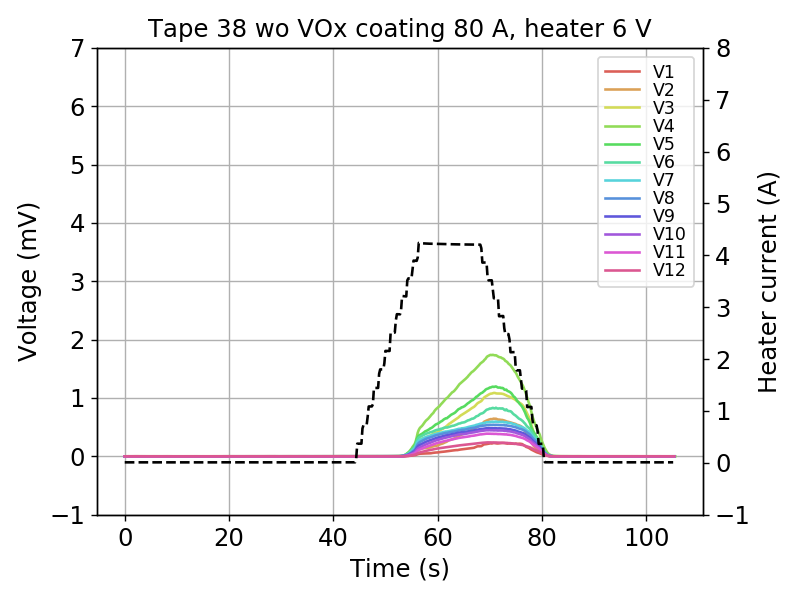

V_heater 6 : Max V4 = 0.0017299660849204302 V, index 353
[0.00022372 0.00064091 0.00108152 0.00173953 0.00119362 0.00083081
 0.00059306 0.00053977 0.00048223 0.00044599 0.00038622 0.00023786]
6


<IPython.core.display.Javascript object>


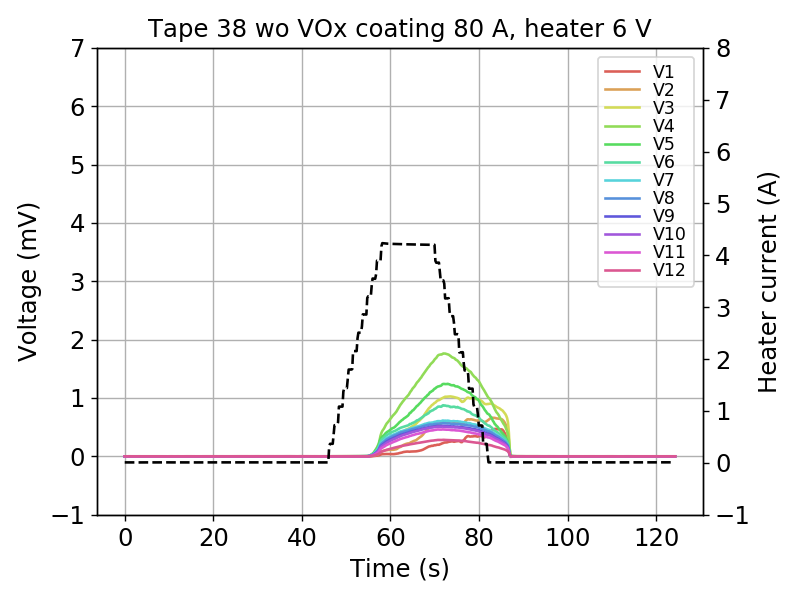

V_heater 6 : Max V4 = 0.00175331894172272 V, index 360
[0.00022876 0.00058407 0.00100654 0.00176304 0.00124046 0.00087627
 0.00061249 0.00056816 0.00052163 0.00050761 0.00046012 0.00028265]
7


<IPython.core.display.Javascript object>


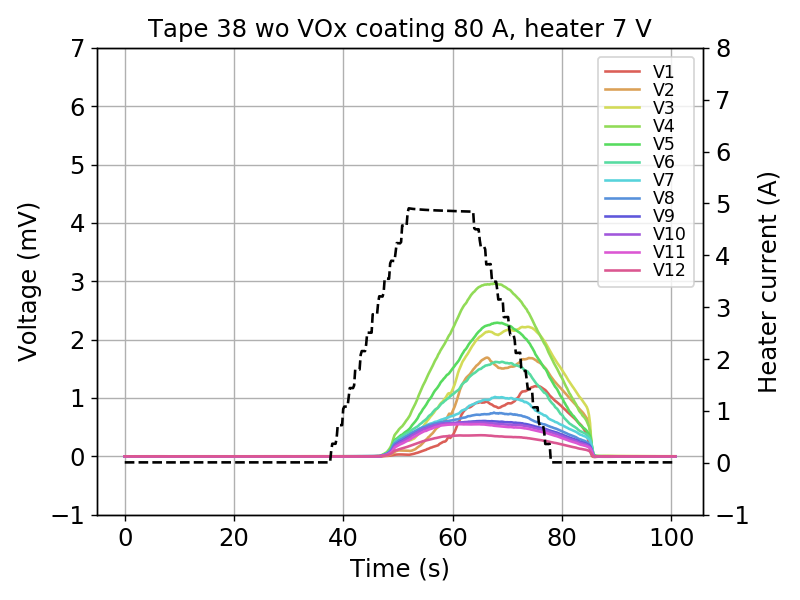

V_heater 7 : Max V4 = 0.00295607433234248 V, index 338
[0.00086015 0.00158171 0.00210883 0.00296538 0.00228317 0.00160419
 0.00100971 0.00074934 0.00059906 0.00056164 0.0005242  0.00034839]
7


<IPython.core.display.Javascript object>


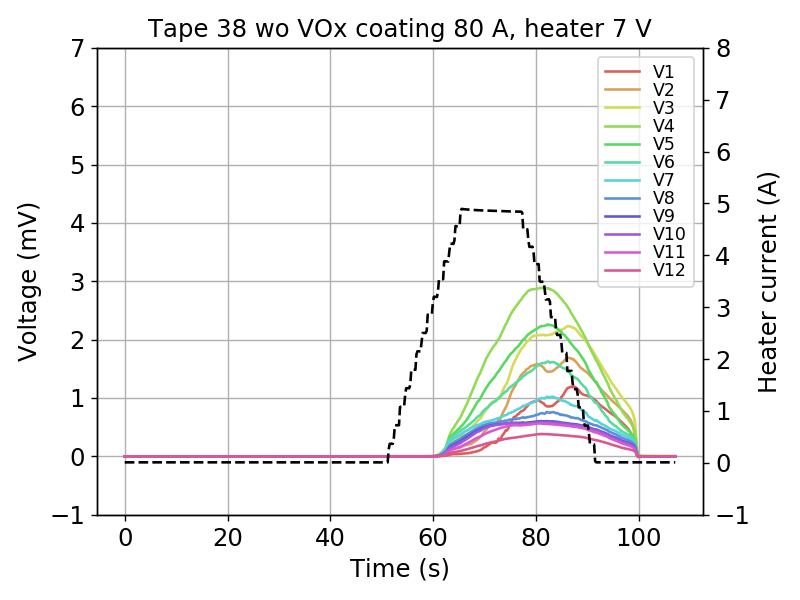

V_heater 7 : Max V4 = 0.00288013730091437 V, index 406
[0.00092456 0.00154483 0.00208219 0.00288946 0.00223055 0.00159499
 0.00099746 0.00073976 0.00060209 0.00057779 0.00056171 0.00038175]
8


<IPython.core.display.Javascript object>


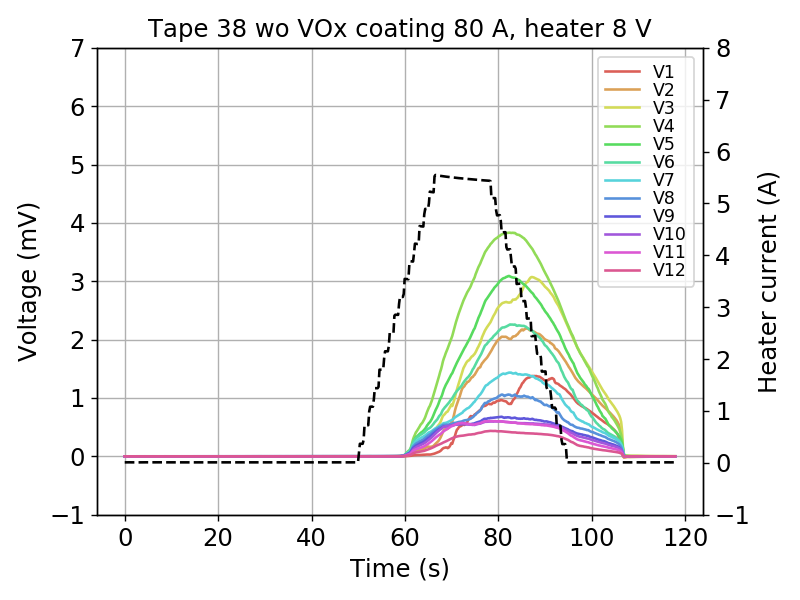

V_heater 8 : Max V4 = 0.0038235576542210797 V, index 413
[0.00089918 0.00201251 0.00263878 0.00383292 0.00308179 0.00226048
 0.00143358 0.00105528 0.00066423 0.00058254 0.00058134 0.00041458]
8


<IPython.core.display.Javascript object>


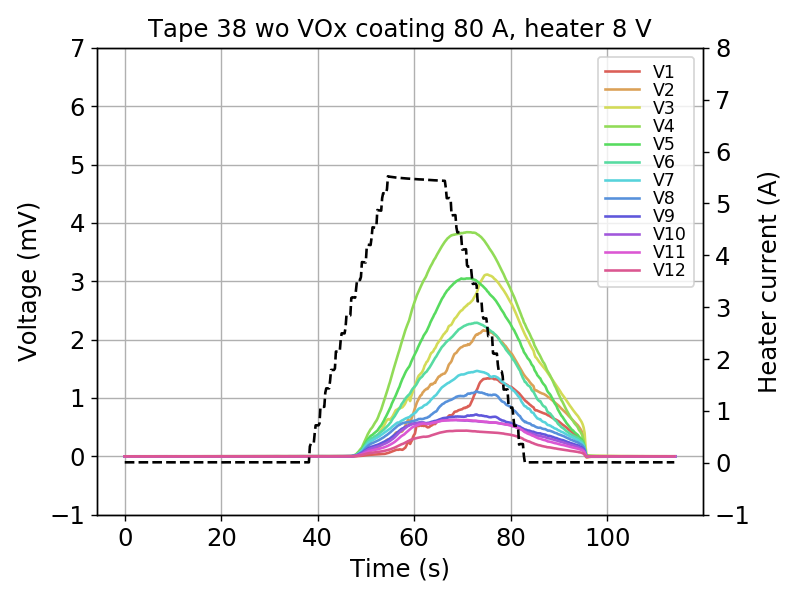

V_heater 8 : Max V4 = 0.0038319518591204897 V, index 355
[0.00083966 0.00190255 0.00258398 0.00384148 0.00304936 0.00225633
 0.00142624 0.00106231 0.00069731 0.00061445 0.00062246 0.00043981]
8.5


<IPython.core.display.Javascript object>


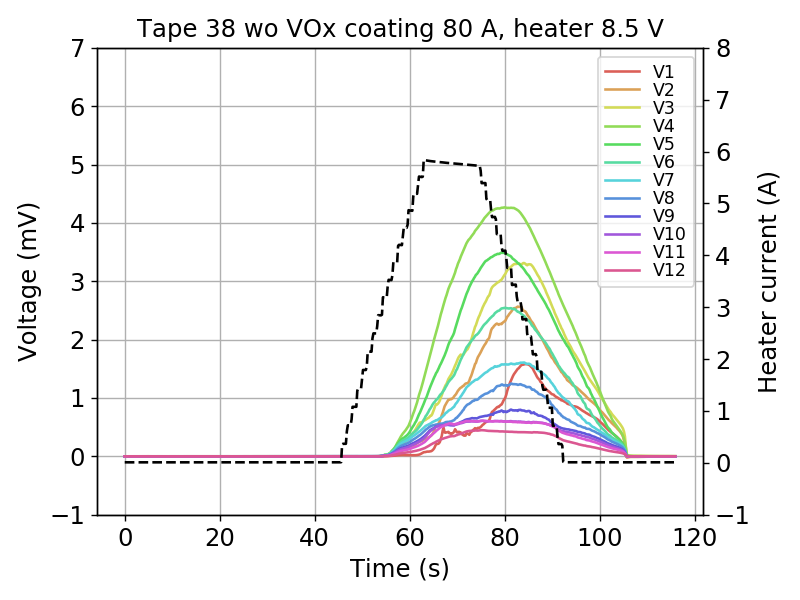

V_heater 8.5 : Max V4 = 0.0042577077886316 V, index 400
[0.00097926 0.00231152 0.00310684 0.00426697 0.00348602 0.00254372
 0.00157412 0.00121541 0.00076814 0.0005993  0.00059583 0.00042422]
8.5


<IPython.core.display.Javascript object>


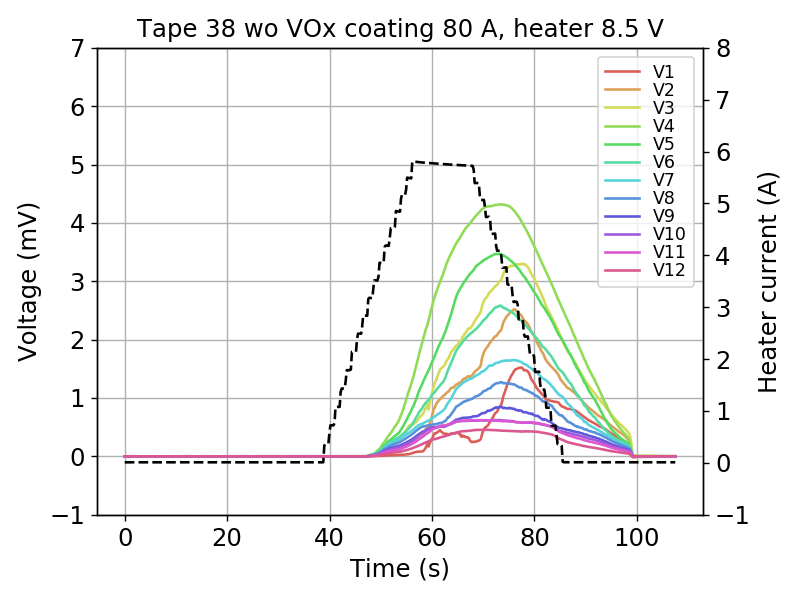

V_heater 8.5 : Max V4 = 0.00430937361973377 V, index 366
[0.00083506 0.00213185 0.00299392 0.00431896 0.0034707  0.00257991
 0.00161368 0.00126046 0.00084714 0.0006218  0.00060854 0.00044455]


<IPython.core.display.Javascript object>


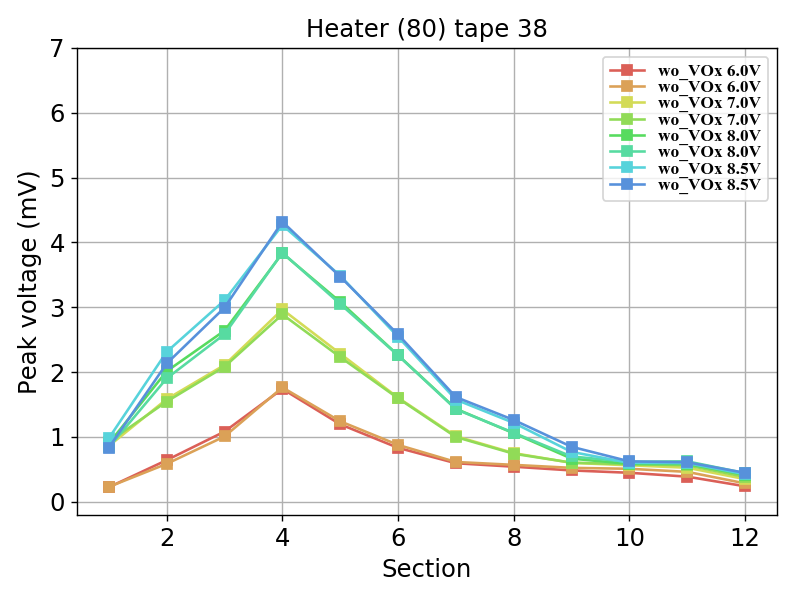

In [33]:
%matplotlib notebook
tape_number = 38
current_percent = 80
coating = 'wo'
filename_wo = f'Tape {tape_number} heater {current_percent} A peak voltages without coating.txt'

Vheater = [6,6,7,7,8,8,8.5,8.5]
file_csv = [
'tape38_w_cu_2020-02-14-14-11-06.csv',
'tape38_w_cu_2020-02-14-14-27-35.csv',
'tape38_w_cu_2020-02-14-14-40-06.csv',
'tape38_w_cu_2020-02-14-14-56-15.csv',
'tape38_w_cu_2020-02-14-15-06-33.csv',
'tape38_w_cu_2020-02-14-15-23-25.csv',
'tape38_w_cu_2020-02-14-15-34-46.csv',
'tape38_w_cu_2020-02-14-15-47-10.csv'
]


for i in range(len(file_csv)):
    filenumber = i
    main(file_csv[i],tape_number,Vheater[i],filenumber,current_percent,filename_wo,coating)
    
    
v_profile_plot(filename_wo)

6


<IPython.core.display.Javascript object>


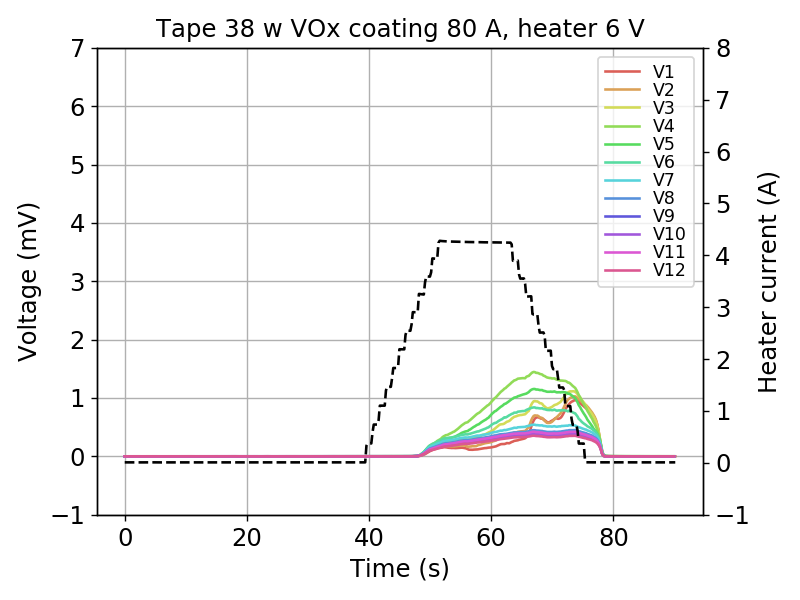

V_heater 6 : Max V4 = 0.00143585756357409 V, index 335
[0.00061349 0.00069155 0.0009428  0.00144563 0.00115401 0.00083791
 0.00054228 0.00044759 0.0003806  0.00038417 0.00042096 0.00035299]
6


<IPython.core.display.Javascript object>


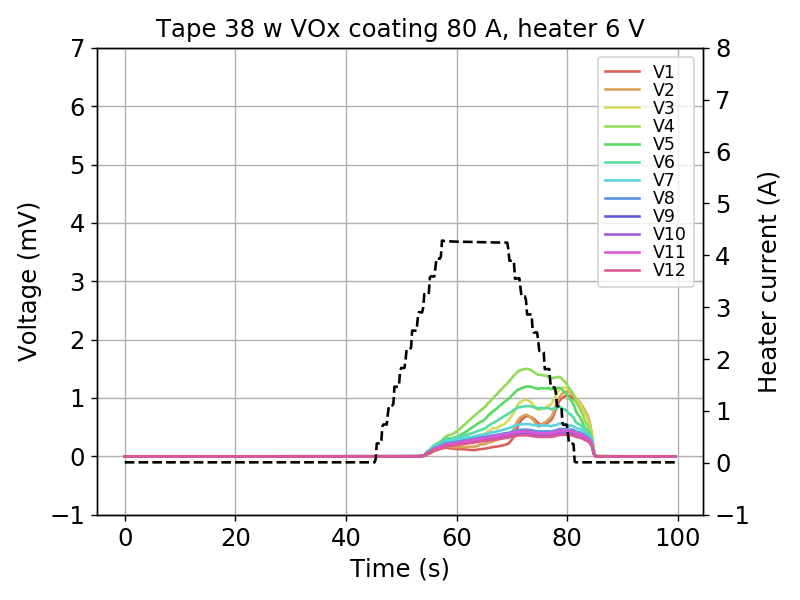

V_heater 6 : Max V4 = 0.001490384 V, index 364
[0.00068711 0.00071206 0.00097071 0.00150016 0.0011977  0.00086171
 0.00055165 0.00045603 0.00038658 0.00039002 0.00042735 0.00035845]
7


<IPython.core.display.Javascript object>


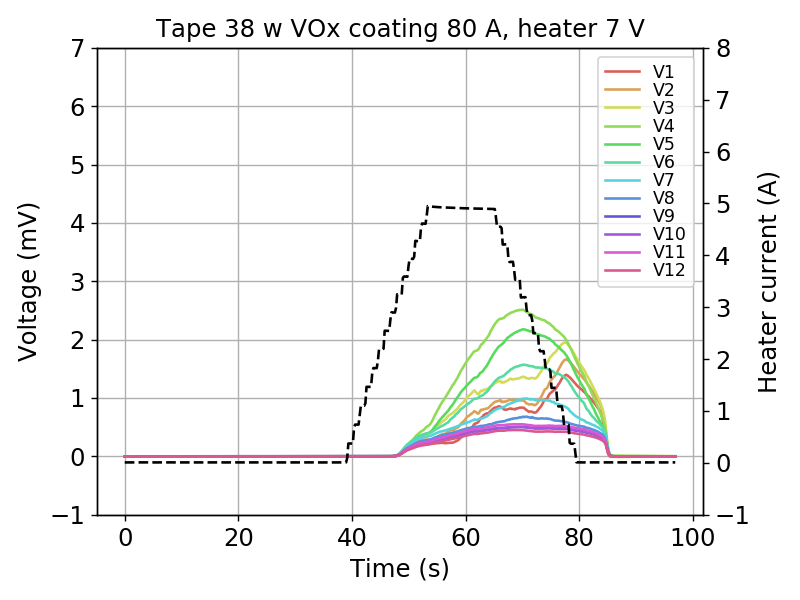

V_heater 7 : Max V4 = 0.002503356 V, index 350
[0.00083645 0.00095742 0.00135893 0.00251323 0.00217314 0.00156463
 0.00098194 0.00067185 0.00050362 0.00050274 0.00054888 0.00044917]
7


<IPython.core.display.Javascript object>


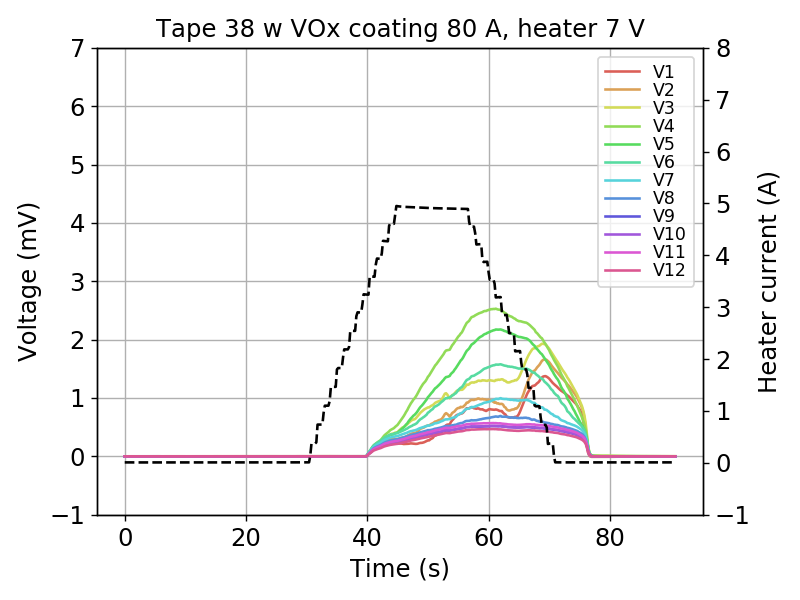

V_heater 7 : Max V4 = 0.00252063 V, index 306
[0.00080314 0.00092492 0.00130825 0.00253063 0.00217348 0.00157222
 0.00098399 0.00068296 0.00052119 0.00052034 0.00056891 0.00046645]
8


<IPython.core.display.Javascript object>


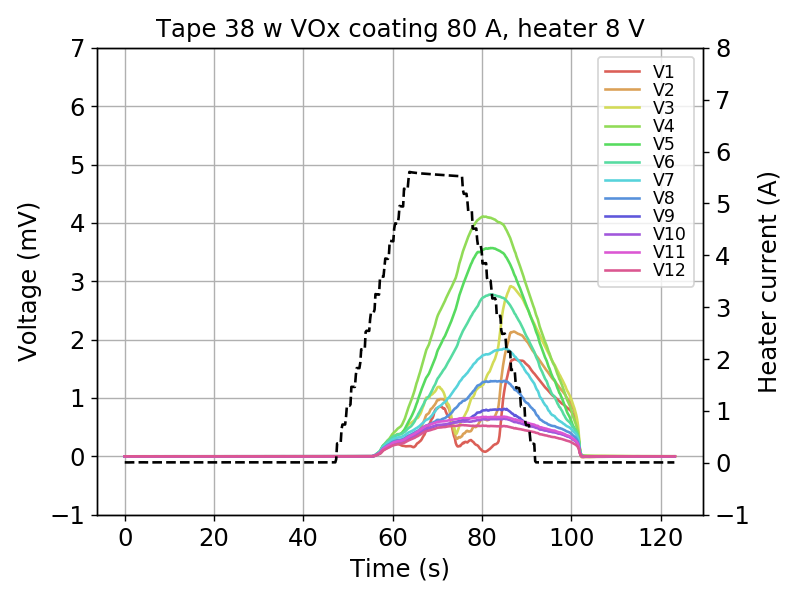

V_heater 8 : Max V4 = 0.00410061630579153 V, index 402
[8.49584040e-05 6.67915672e-04 1.23126187e-03 4.11069455e-03
 3.54433291e-03 2.72594465e-03 1.73557153e-03 1.27428432e-03
 7.89017349e-04 6.35656902e-04 6.75648277e-04 5.25550534e-04]
8


<IPython.core.display.Javascript object>


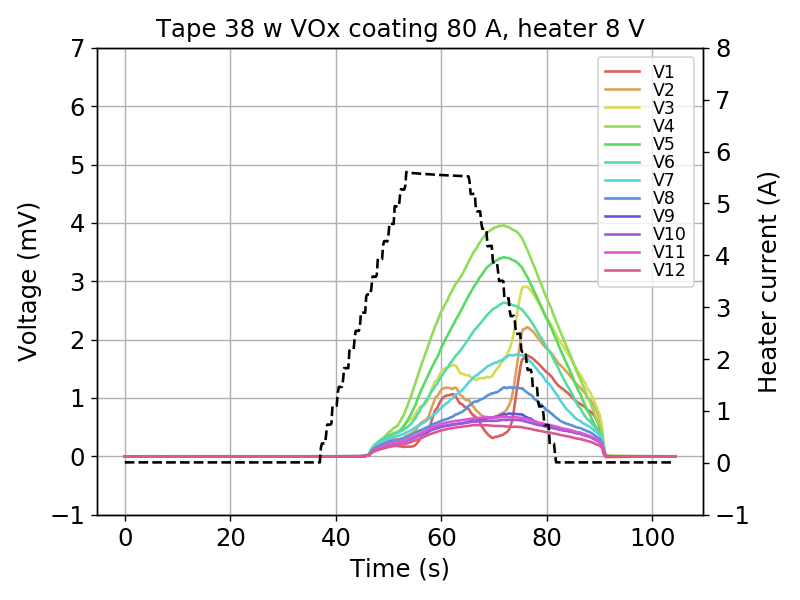

V_heater 8 : Max V4 = 0.0039473298509214395 V, index 359
[0.00037483 0.00075051 0.00164894 0.0039571  0.00341079 0.00262958
 0.00166857 0.001179   0.00072336 0.00062575 0.00067558 0.00051816]
8.5


<IPython.core.display.Javascript object>


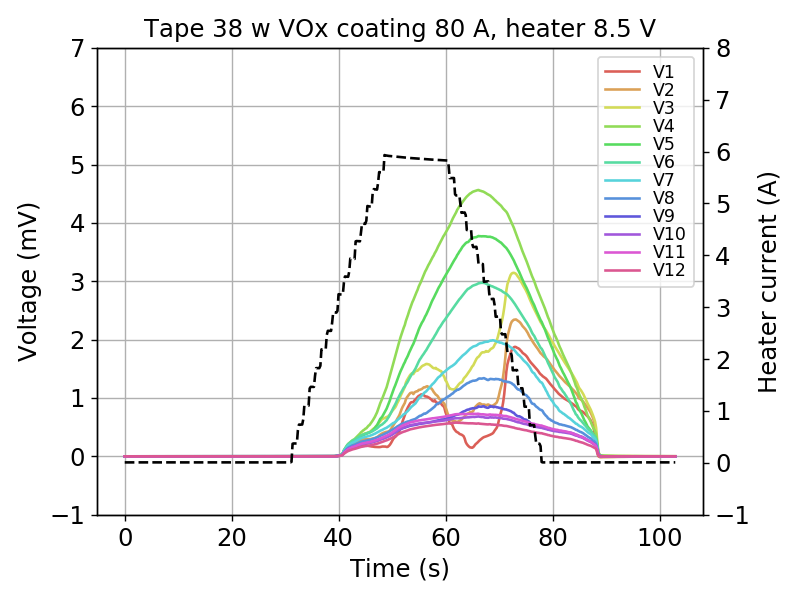

V_heater 8.5 : Max V4 = 0.004554953 V, index 331
[0.00025591 0.00090021 0.00170625 0.00456505 0.00377681 0.0029667
 0.00192593 0.00133016 0.00085542 0.00068329 0.00072872 0.00056407]
8.5


<IPython.core.display.Javascript object>


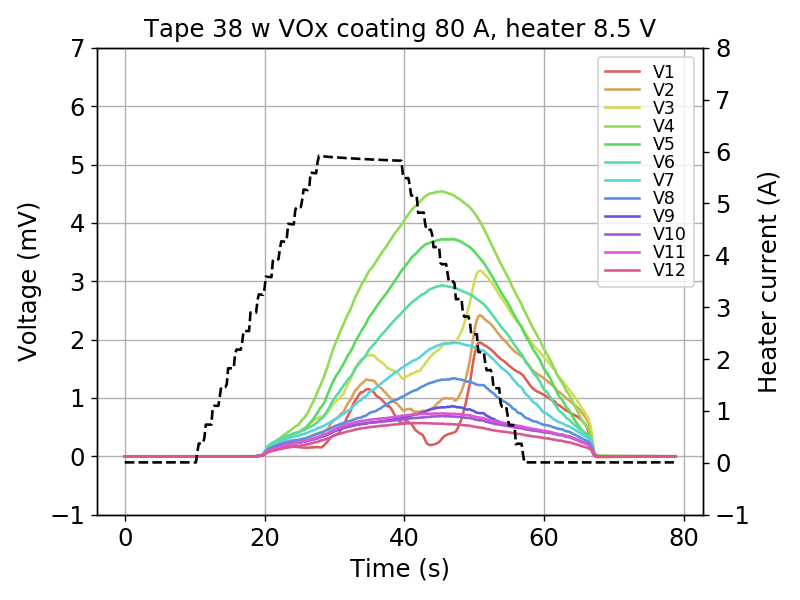

V_heater 8.5 : Max V4 = 0.00453253409861349 V, index 227
[0.0003023  0.00097942 0.00188778 0.00454269 0.00372174 0.0029303
 0.00192619 0.00131646 0.00084223 0.00069161 0.00073621 0.00055966]


<IPython.core.display.Javascript object>


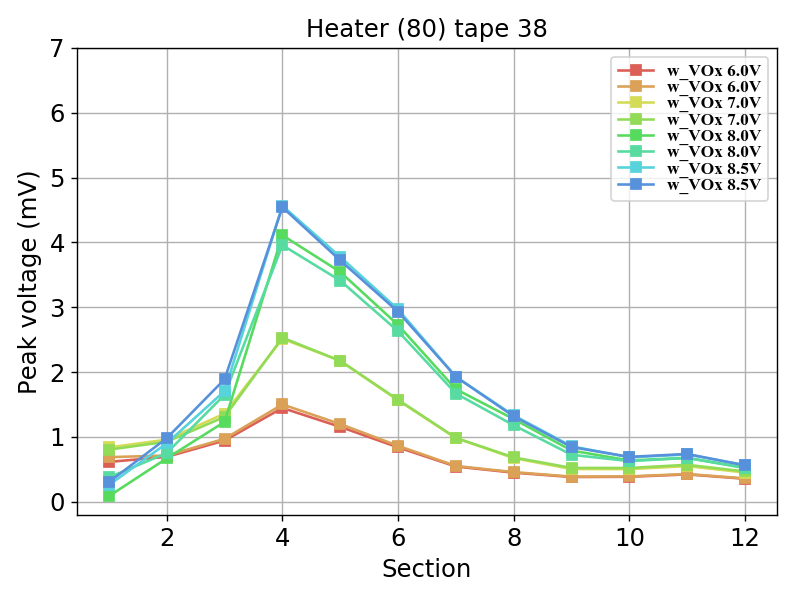

In [38]:
%matplotlib notebook
tape_number = 38
current_percent = 80
coating = 'w'
filename_w = f'Tape {tape_number} heater {current_percent} A peak voltages with coating.txt'

Vheater = [6,6,7,7,8,8,8.5,8.5]
file_csv = [
'tape38_w_cu_coating_2020-02-19-15-25-58.csv',
'tape38_w_cu_coating_2020-02-19-15-40-35.csv',
#'tape38_w_cu_coating_2020-02-19-15-56-29.csv', 7 V also
'tape38_w_cu_coating_2020-02-19-16-10-51.csv',
'tape38_w_cu_coating_2020-02-19-16-26-35.csv',
'tape38_w_cu_coating_2020-02-19-16-43-06.csv',
'tape38_w_cu_coating_2020-02-19-17-03-35.csv',
'tape38_w_cu_coating_2020-02-19-17-20-44.csv',
'tape38_w_cu_coating_2020-02-19-17-38-23.csv'
]


for i in range(len(file_csv)):
    filenumber = i
    main(file_csv[i],tape_number,Vheater[i],filenumber,current_percent,filename_w,coating)
    
    
v_profile_plot(filename_w)

<IPython.core.display.Javascript object>


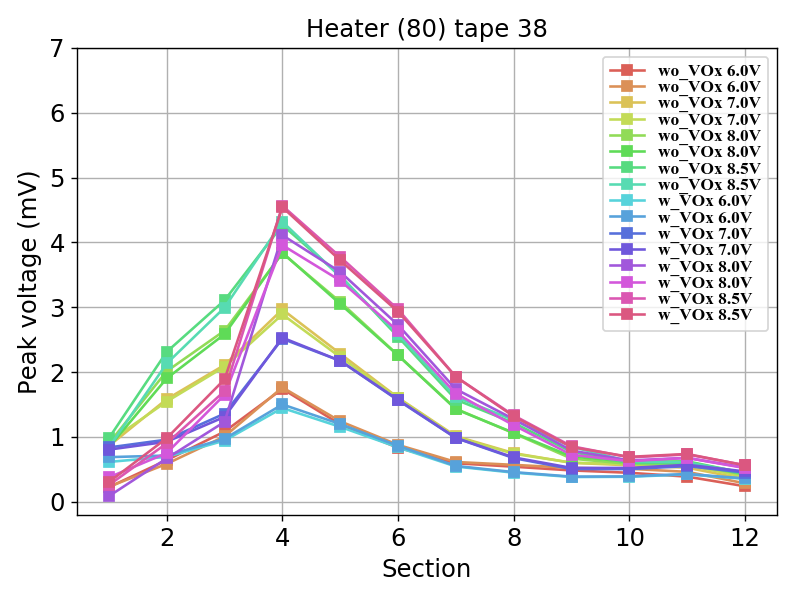

In [39]:
sns.set_palette(sns.color_palette("hls", 16))
fig,ax = plt.subplots()
v_profile_plot2(filename_wo,'wo')
v_profile_plot2(filename_w,'w')
plt.grid()
plt.show()